# Tutorial 5: Running a workflow on cloud platform using Dockstore
This tutorial uses sparc-flow to run the standardised workflow described in Tutorial 2 on a cloud platform (in this demonstration we run on the Cancer GenomicsCloud) using Dockstore.

## General introduction
The official best practice for Dockstore can be found here: [register a workflow on dockstore](https://docs.dockstore.org/en/stable/getting-started/dockstore-workflows.html). It is recommended to use a Github repository to connect to the Dockstore Github app.

The steps to do this are:
  - Create a Github account.
  - Create a Dockstore account.
  - Prepare the workflow project.
  - [Create a .dockstore.yml file](https://docs.dockstore.org/en/stable/getting-started/github-apps/github-apps.html), this is for dockstore automatically sync with Github.
  - Follow the [guideline](https://docs.dockstore.org/en/stable/getting-started/dockstore-workflows.html), to create a repository and load the workflow code inside, then connect to Dockstore. 

## Prepare workflow project
In tutorial 3 we use workflow.load function to move the required tools for a workflow into aworkflow dataset. So now we have the entire prejects under workflow dataset primary folder (workflow + tools + data), the path is `./resources/workflow_dataset/primary/workflow`. These are almost all the files that dockstore cloud needs. 

However, if we want Dockstore cloud automatically sync grab the code from GitHub repository, we need a .dockstore.yml file. We have provided such a file for this tutorial. This file can be programmatically generated using `sparc_flow`. It contains a generate_dockstore_github_requirements() api, so we can use the following command:
```python
  workflow.generate_dockstore_github_requirements(workflow_path="/workflow.cwl",  output_path="./", paras_path_arr=["/inp_job.json"],name="your_name", email="your@gmail.com")
```
It will automatically generate a .dockstore.yml file for you. This file should be located in the same folder as workflow.cwl.

## Push the project into your GitHub repository.

- Here we should noticed, the each GitHub repository branches are Dockstore workflow's versions.
- If we have multiple branches, in the dockstore we will have multiple versions.
- Here is a our simple workflow project example on GitHub repository:


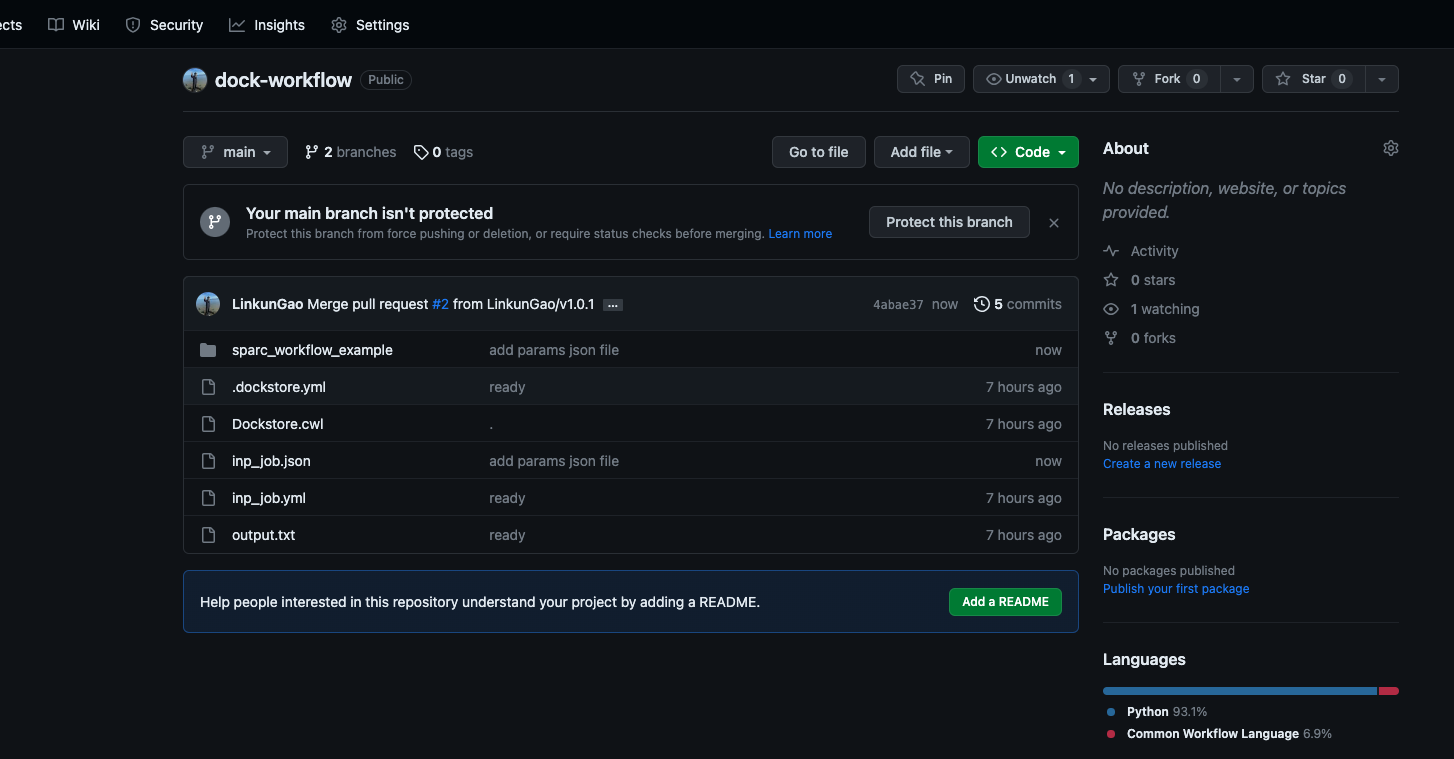

In [2]:
# This code is just to display the screen shot below
from IPython.display import Image
Image(filename='./img/github01.png') 


## Publish the workflow
- Follow the [guideline](https://docs.dockstore.org/en/stable/getting-started/dockstore-workflows.html) to connect Dockstore and GitHub repository.

- After you connect it, the workflow will appear in your Dockstore dashboard's workflow tag. 


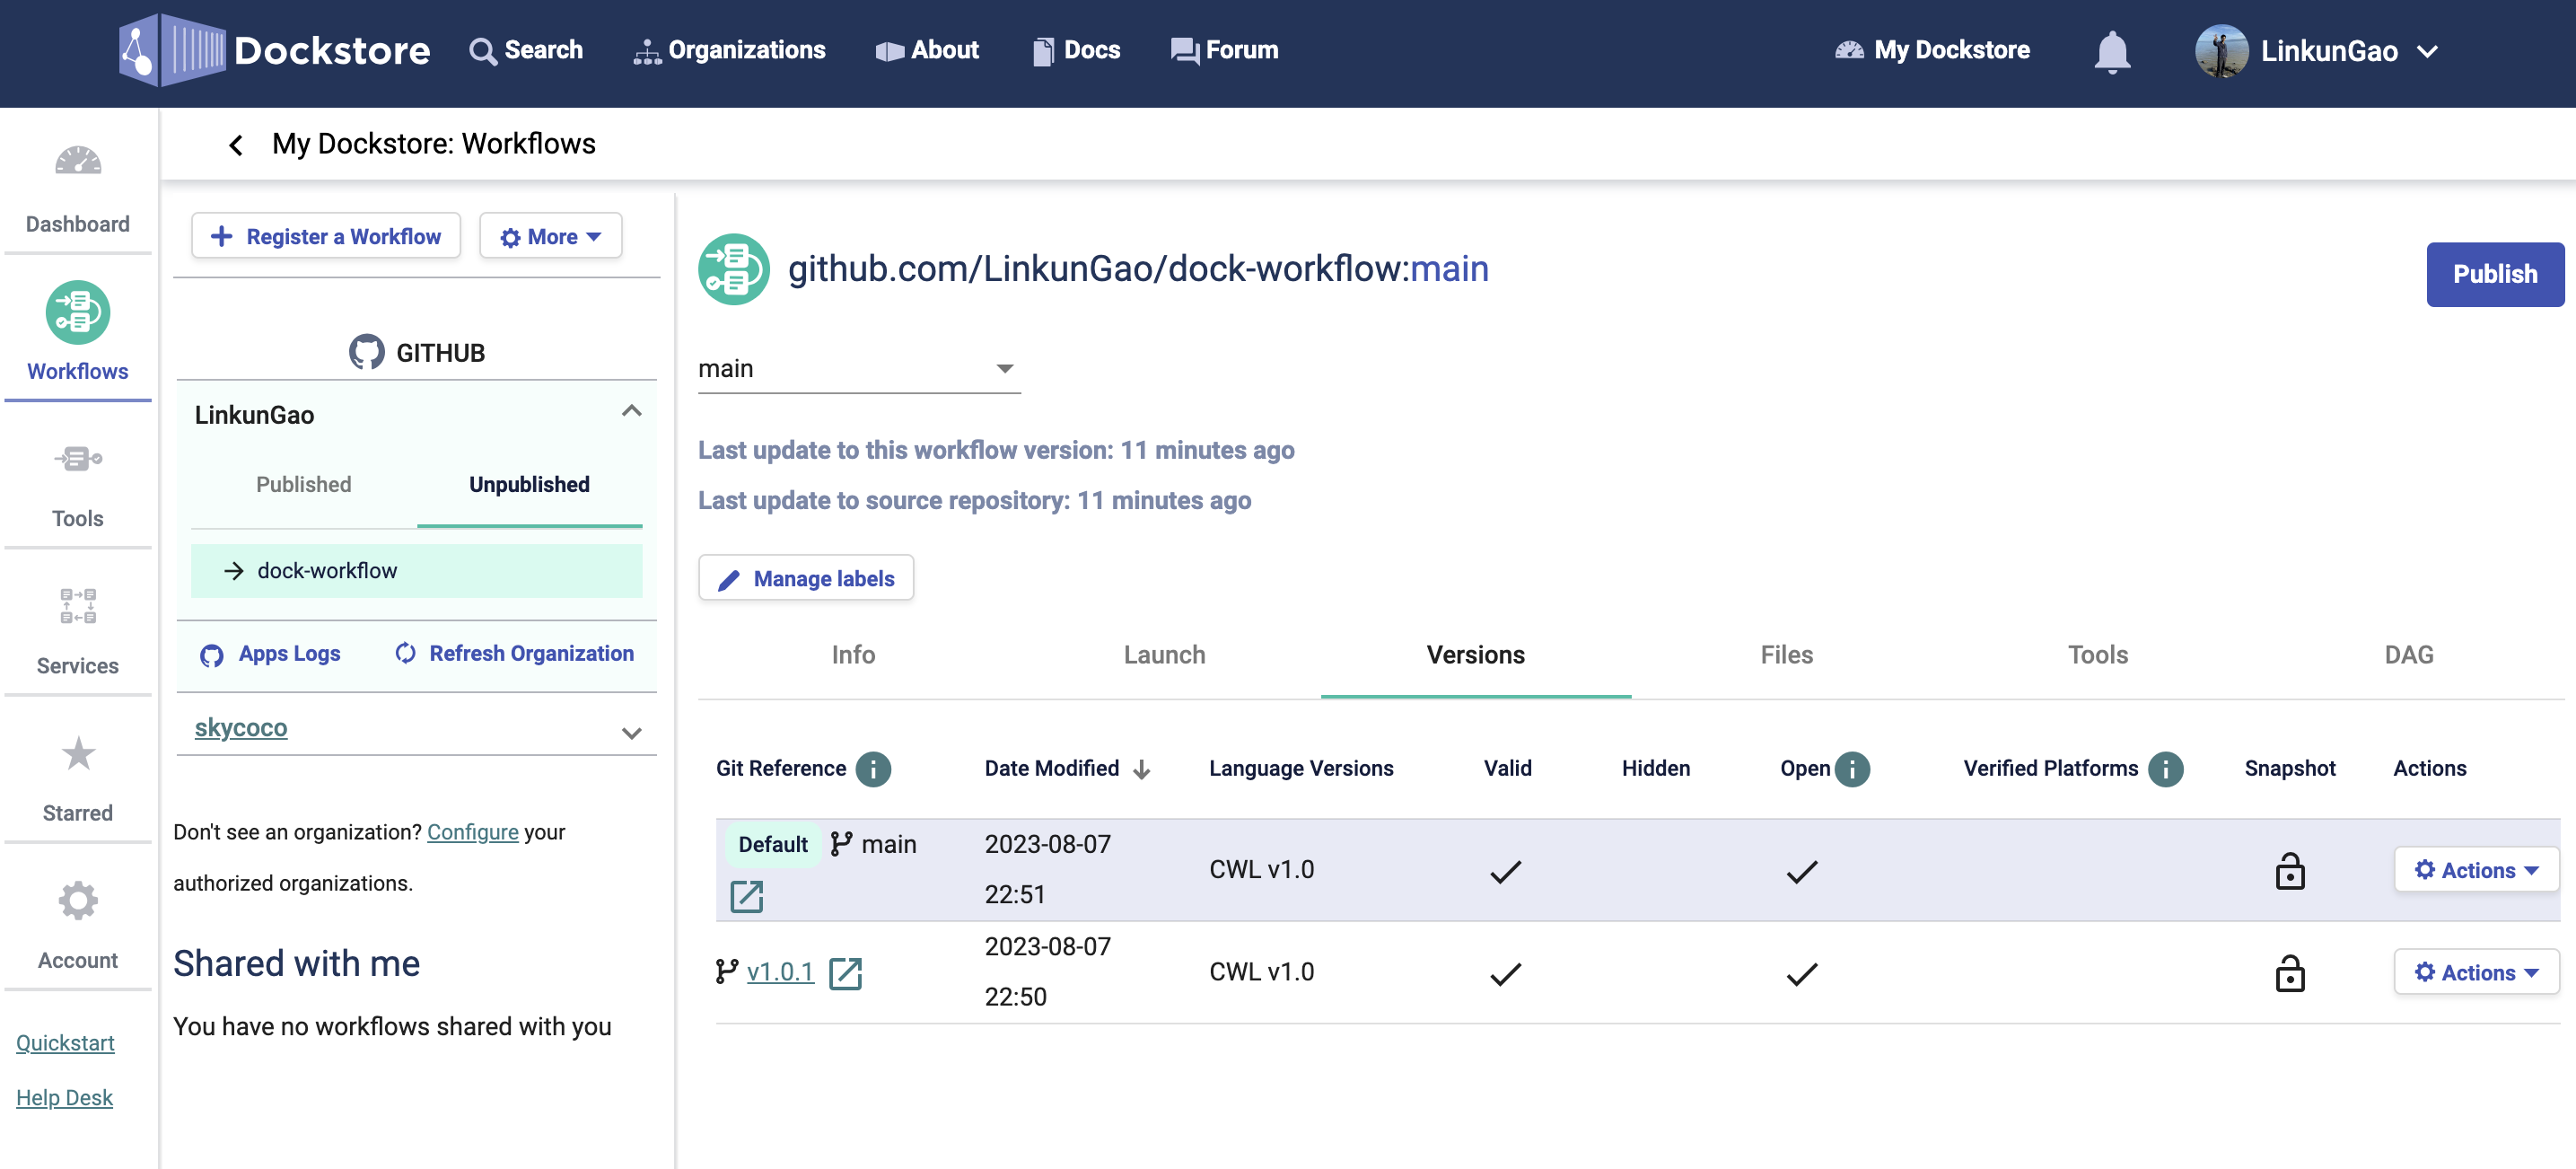

In [3]:
# This code is just to display the screen shot below
Image(filename='./img/dock01.png') 

Initially the workflow is unpulished, if you have multiple versions here, you need to choose one and set it to default, then publish it.

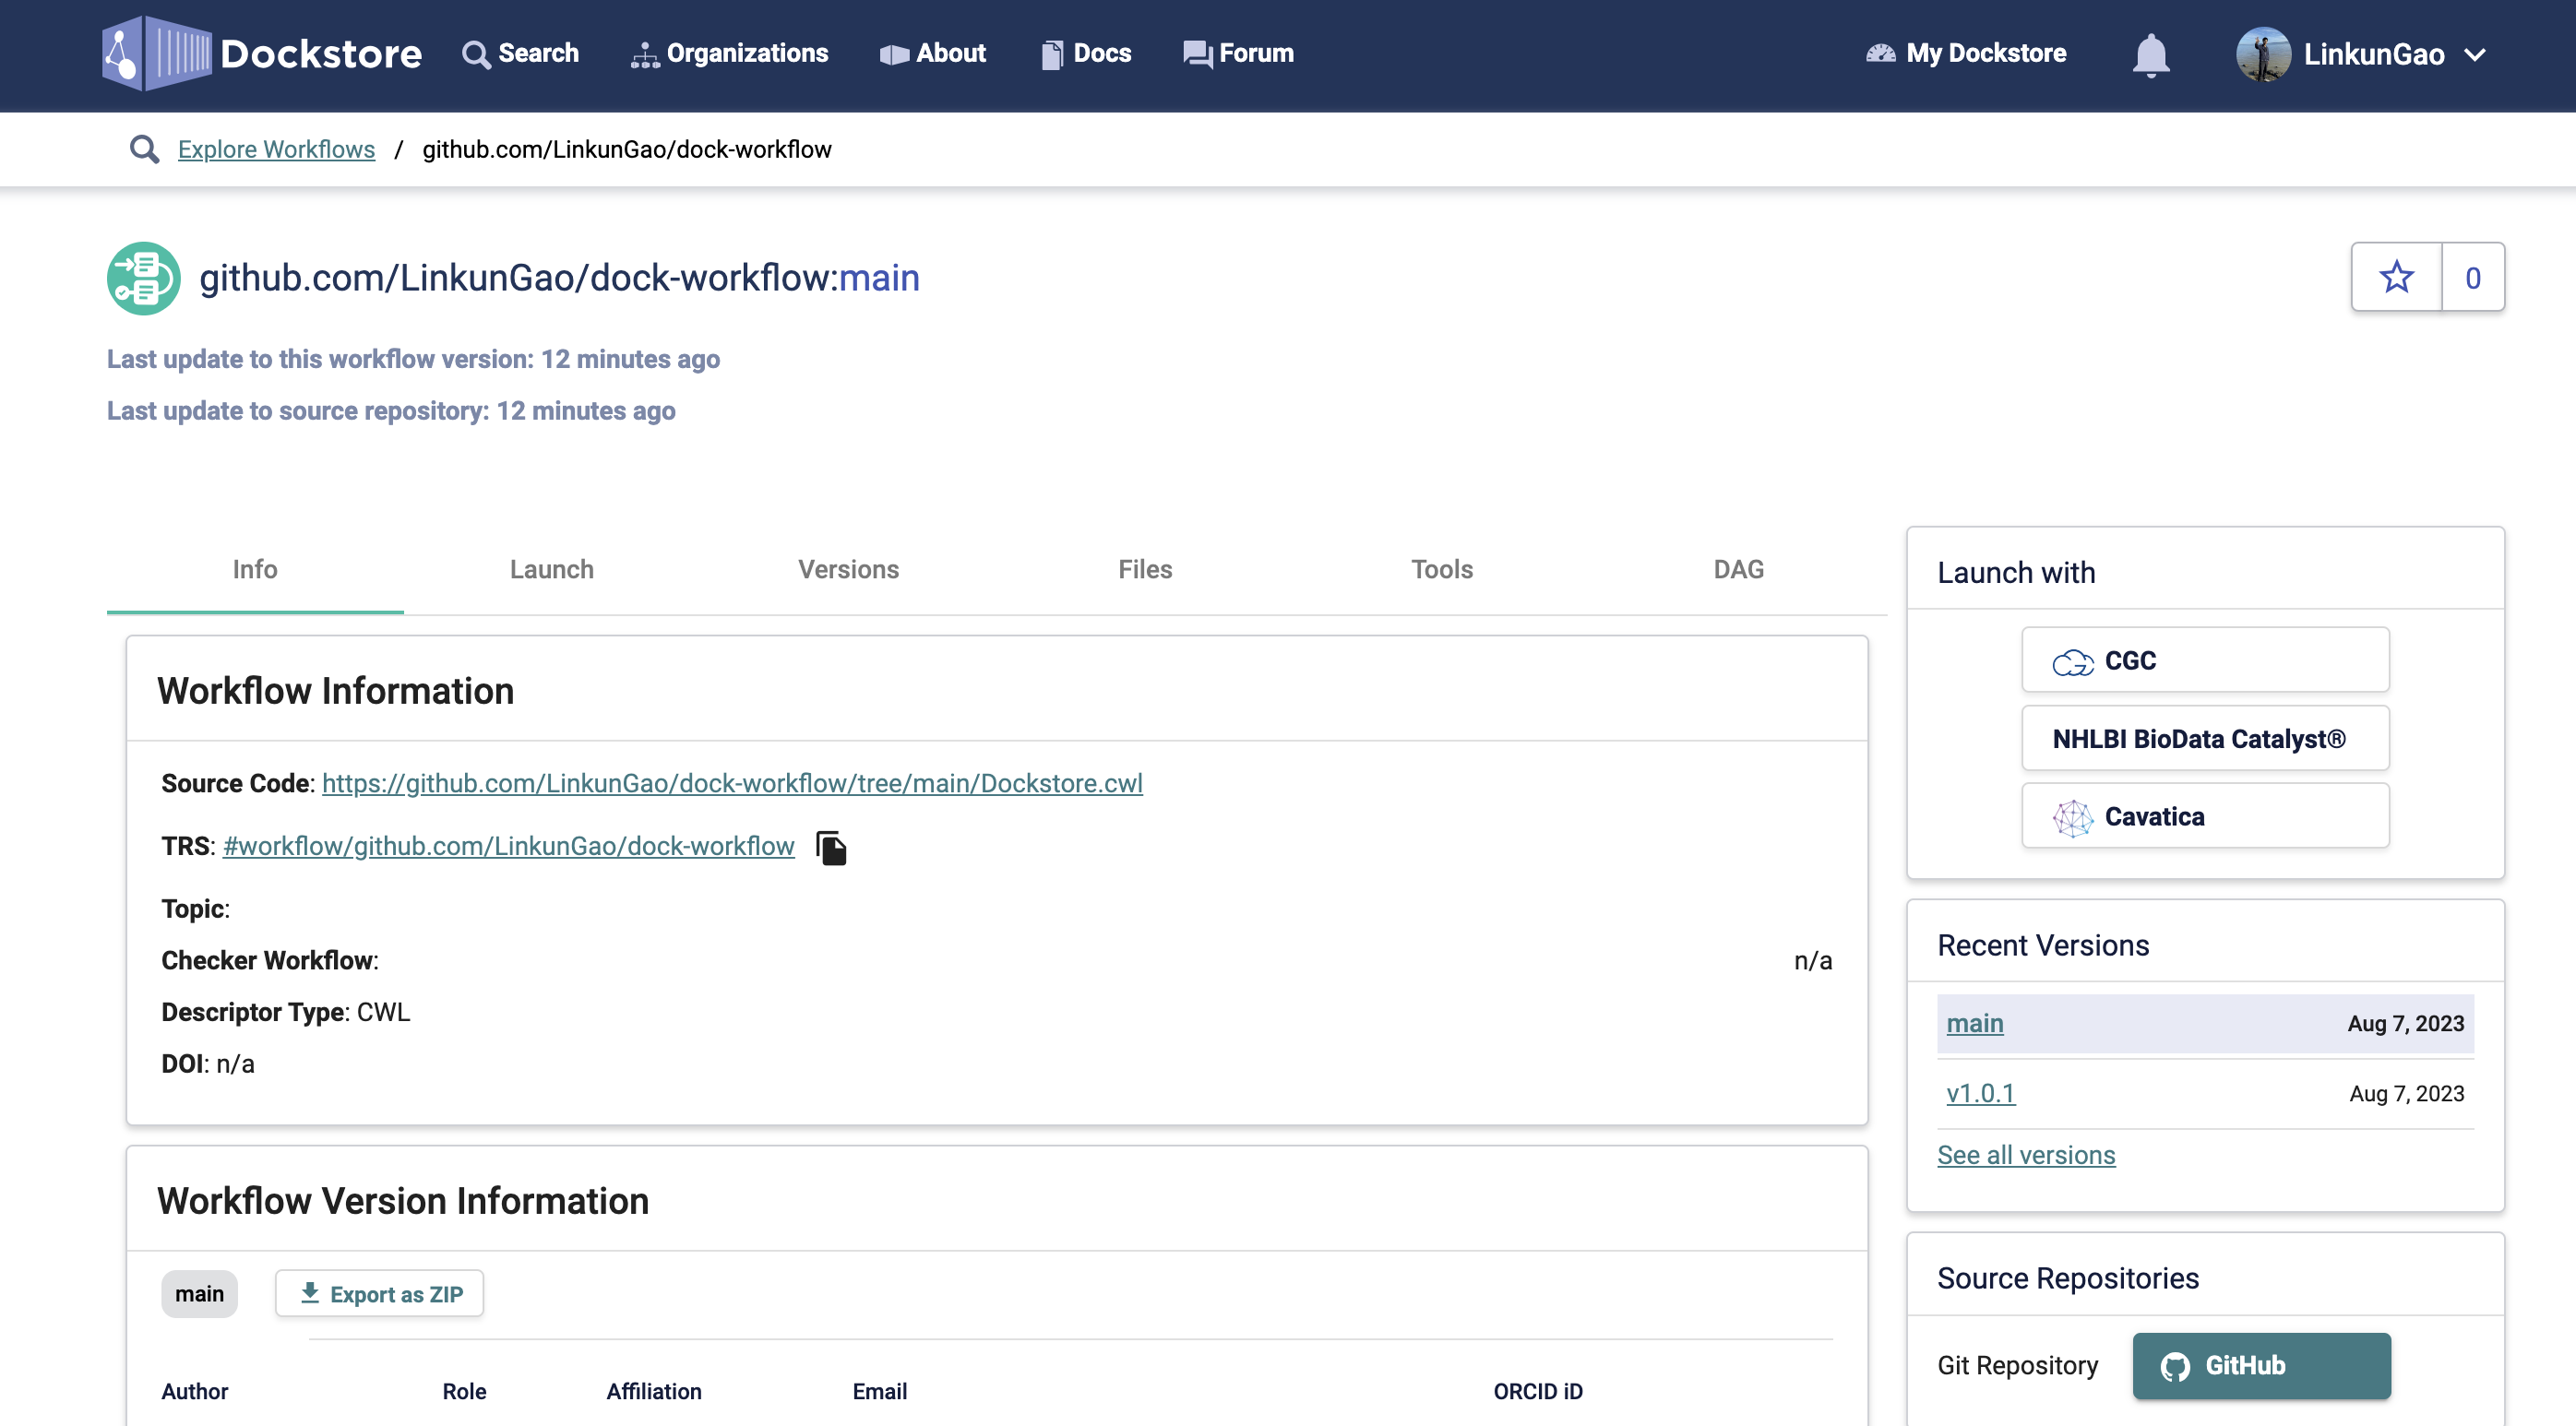

In [4]:
# This code is just to display the screen shot below
Image(filename='./img/dock02.png') 


- After you publish the wolkflow, it will appear in public page, so everyone can use it locally and on cloud platform.

## Run workflow on CGC ([Cancer Genomics Cloud](https://docs.dockstore.org/en/stable/launch-with/cgc-launch-with.html)) 
- After publishing the workflow, it is visible on the public page. On the right hand side of the page there is information about which cloud platforms can run the workflow. The choice of platform depends on which workflow language we are choosing. For example, if we use [CWL](https://www.commonwl.org/user_guide/introduction/quick-start.html) (Common workflow language), it can be running at CGC, NHLBI BioData Catalyst and Cavatica platforms.

- The steps we follow for this example to run our workflow on CGC are as follows:
  - Click the CGC button.
  - Sign up an account for CGC.
  - Create a work project for import workflow from dockstore.


## Here is how the workflow runs in CGC

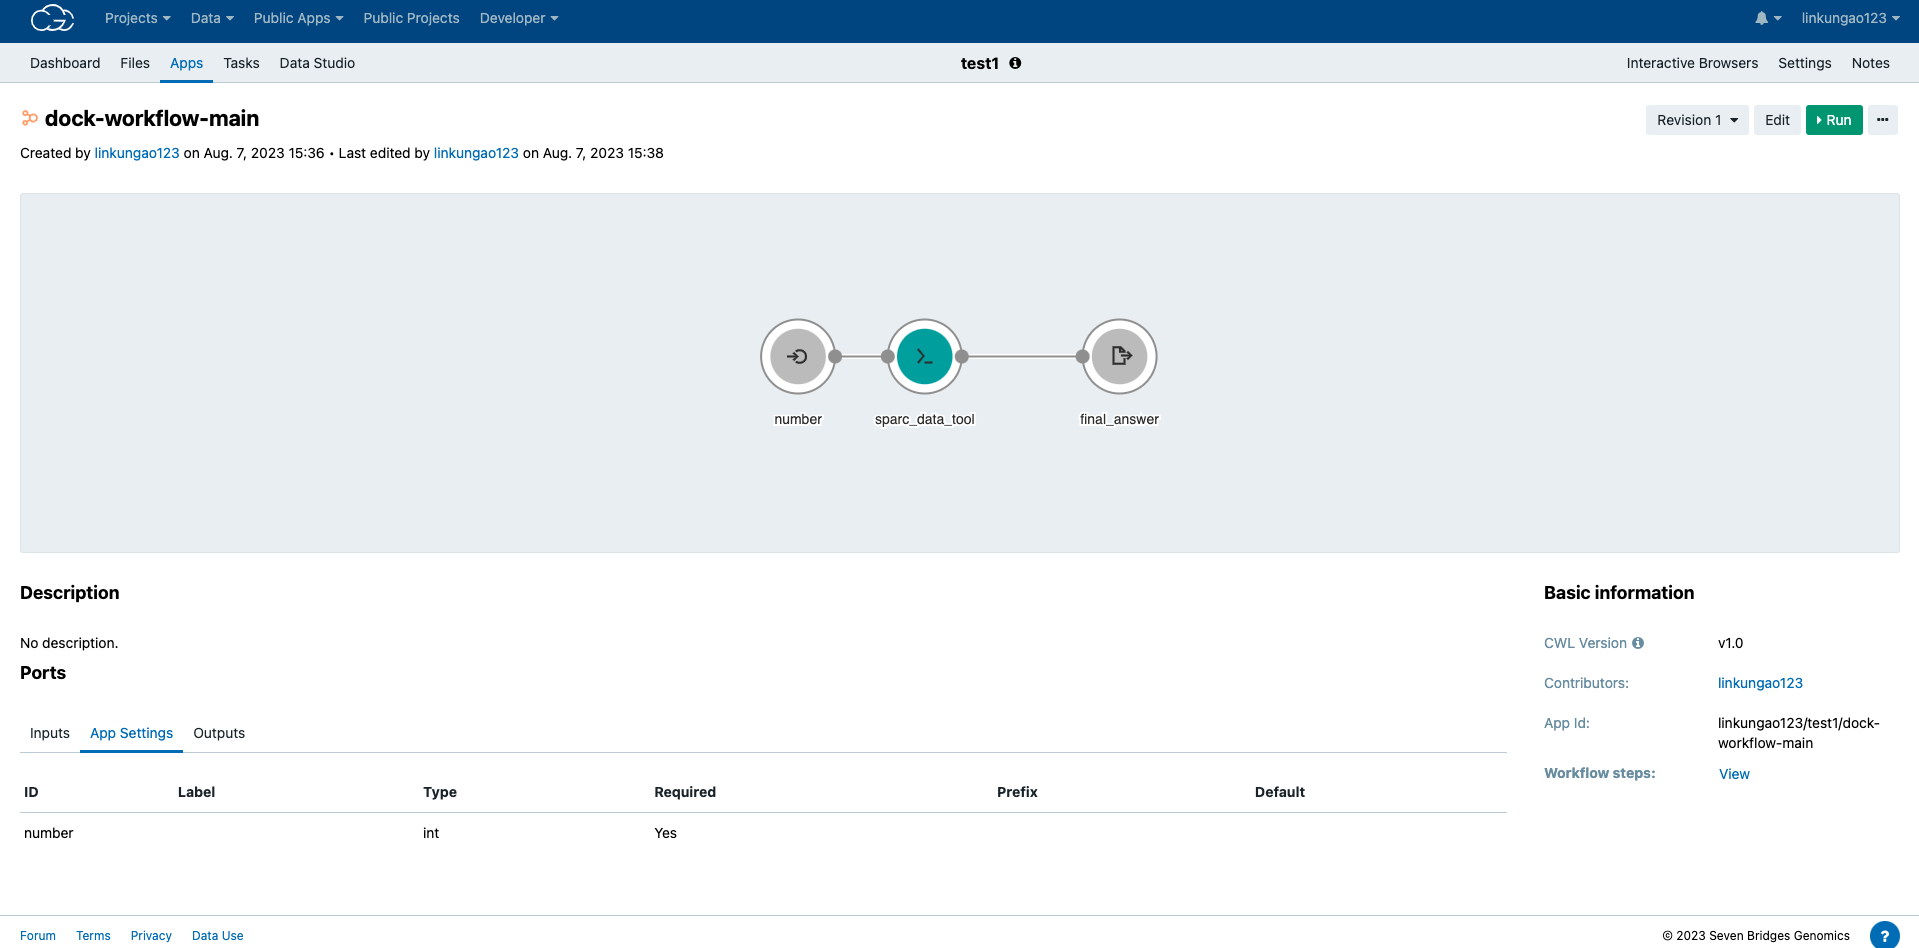

In [5]:
# This code is just to display the screen shot below
Image(filename='./img/cgc01.png') 

- If we click `RUN` button, our workflow will start to execute on the platform.

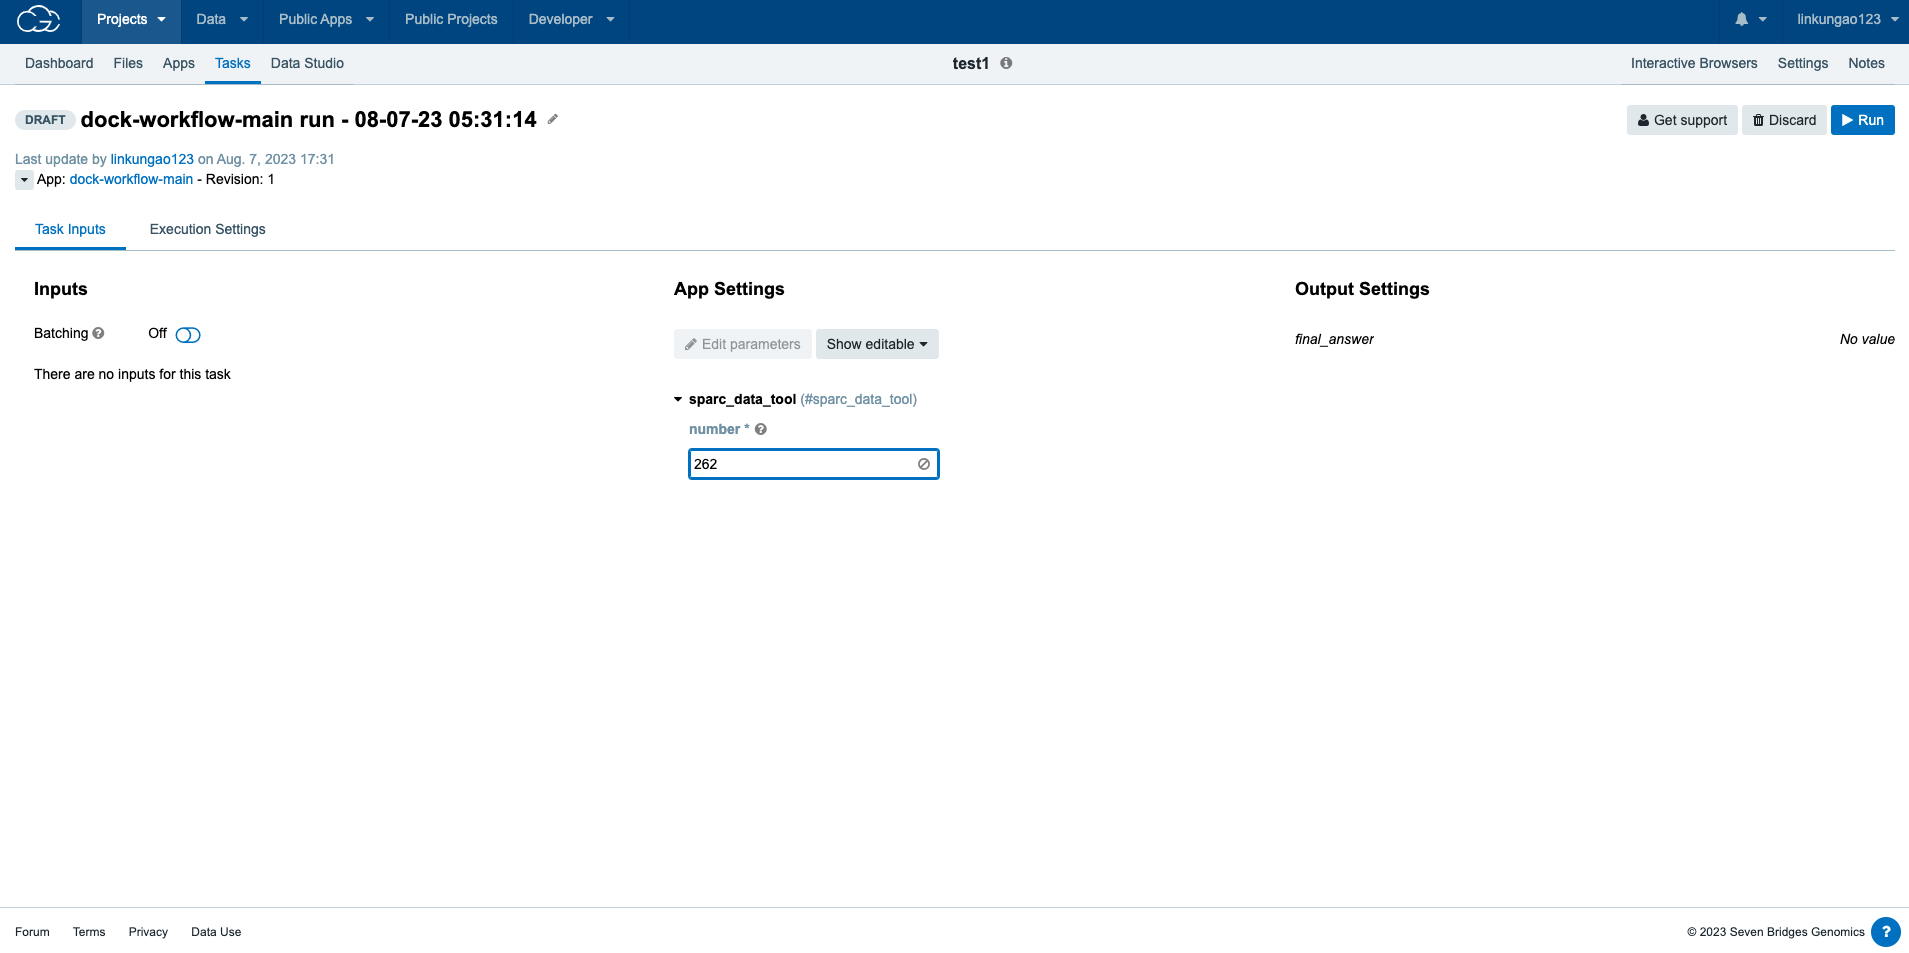

In [6]:
# This code is just to display the screen shot below
Image(filename='./img/cgc02.png') 

  - The figure above shows the workflow starts to run, it lets us to type a number as input. (e.g. the SPARC dataset ID) 
  - No result is shown below as the account in use did not have the necessary funds for the platform to complete the operation.

## Run workflow locally via GitHub and Dockstore


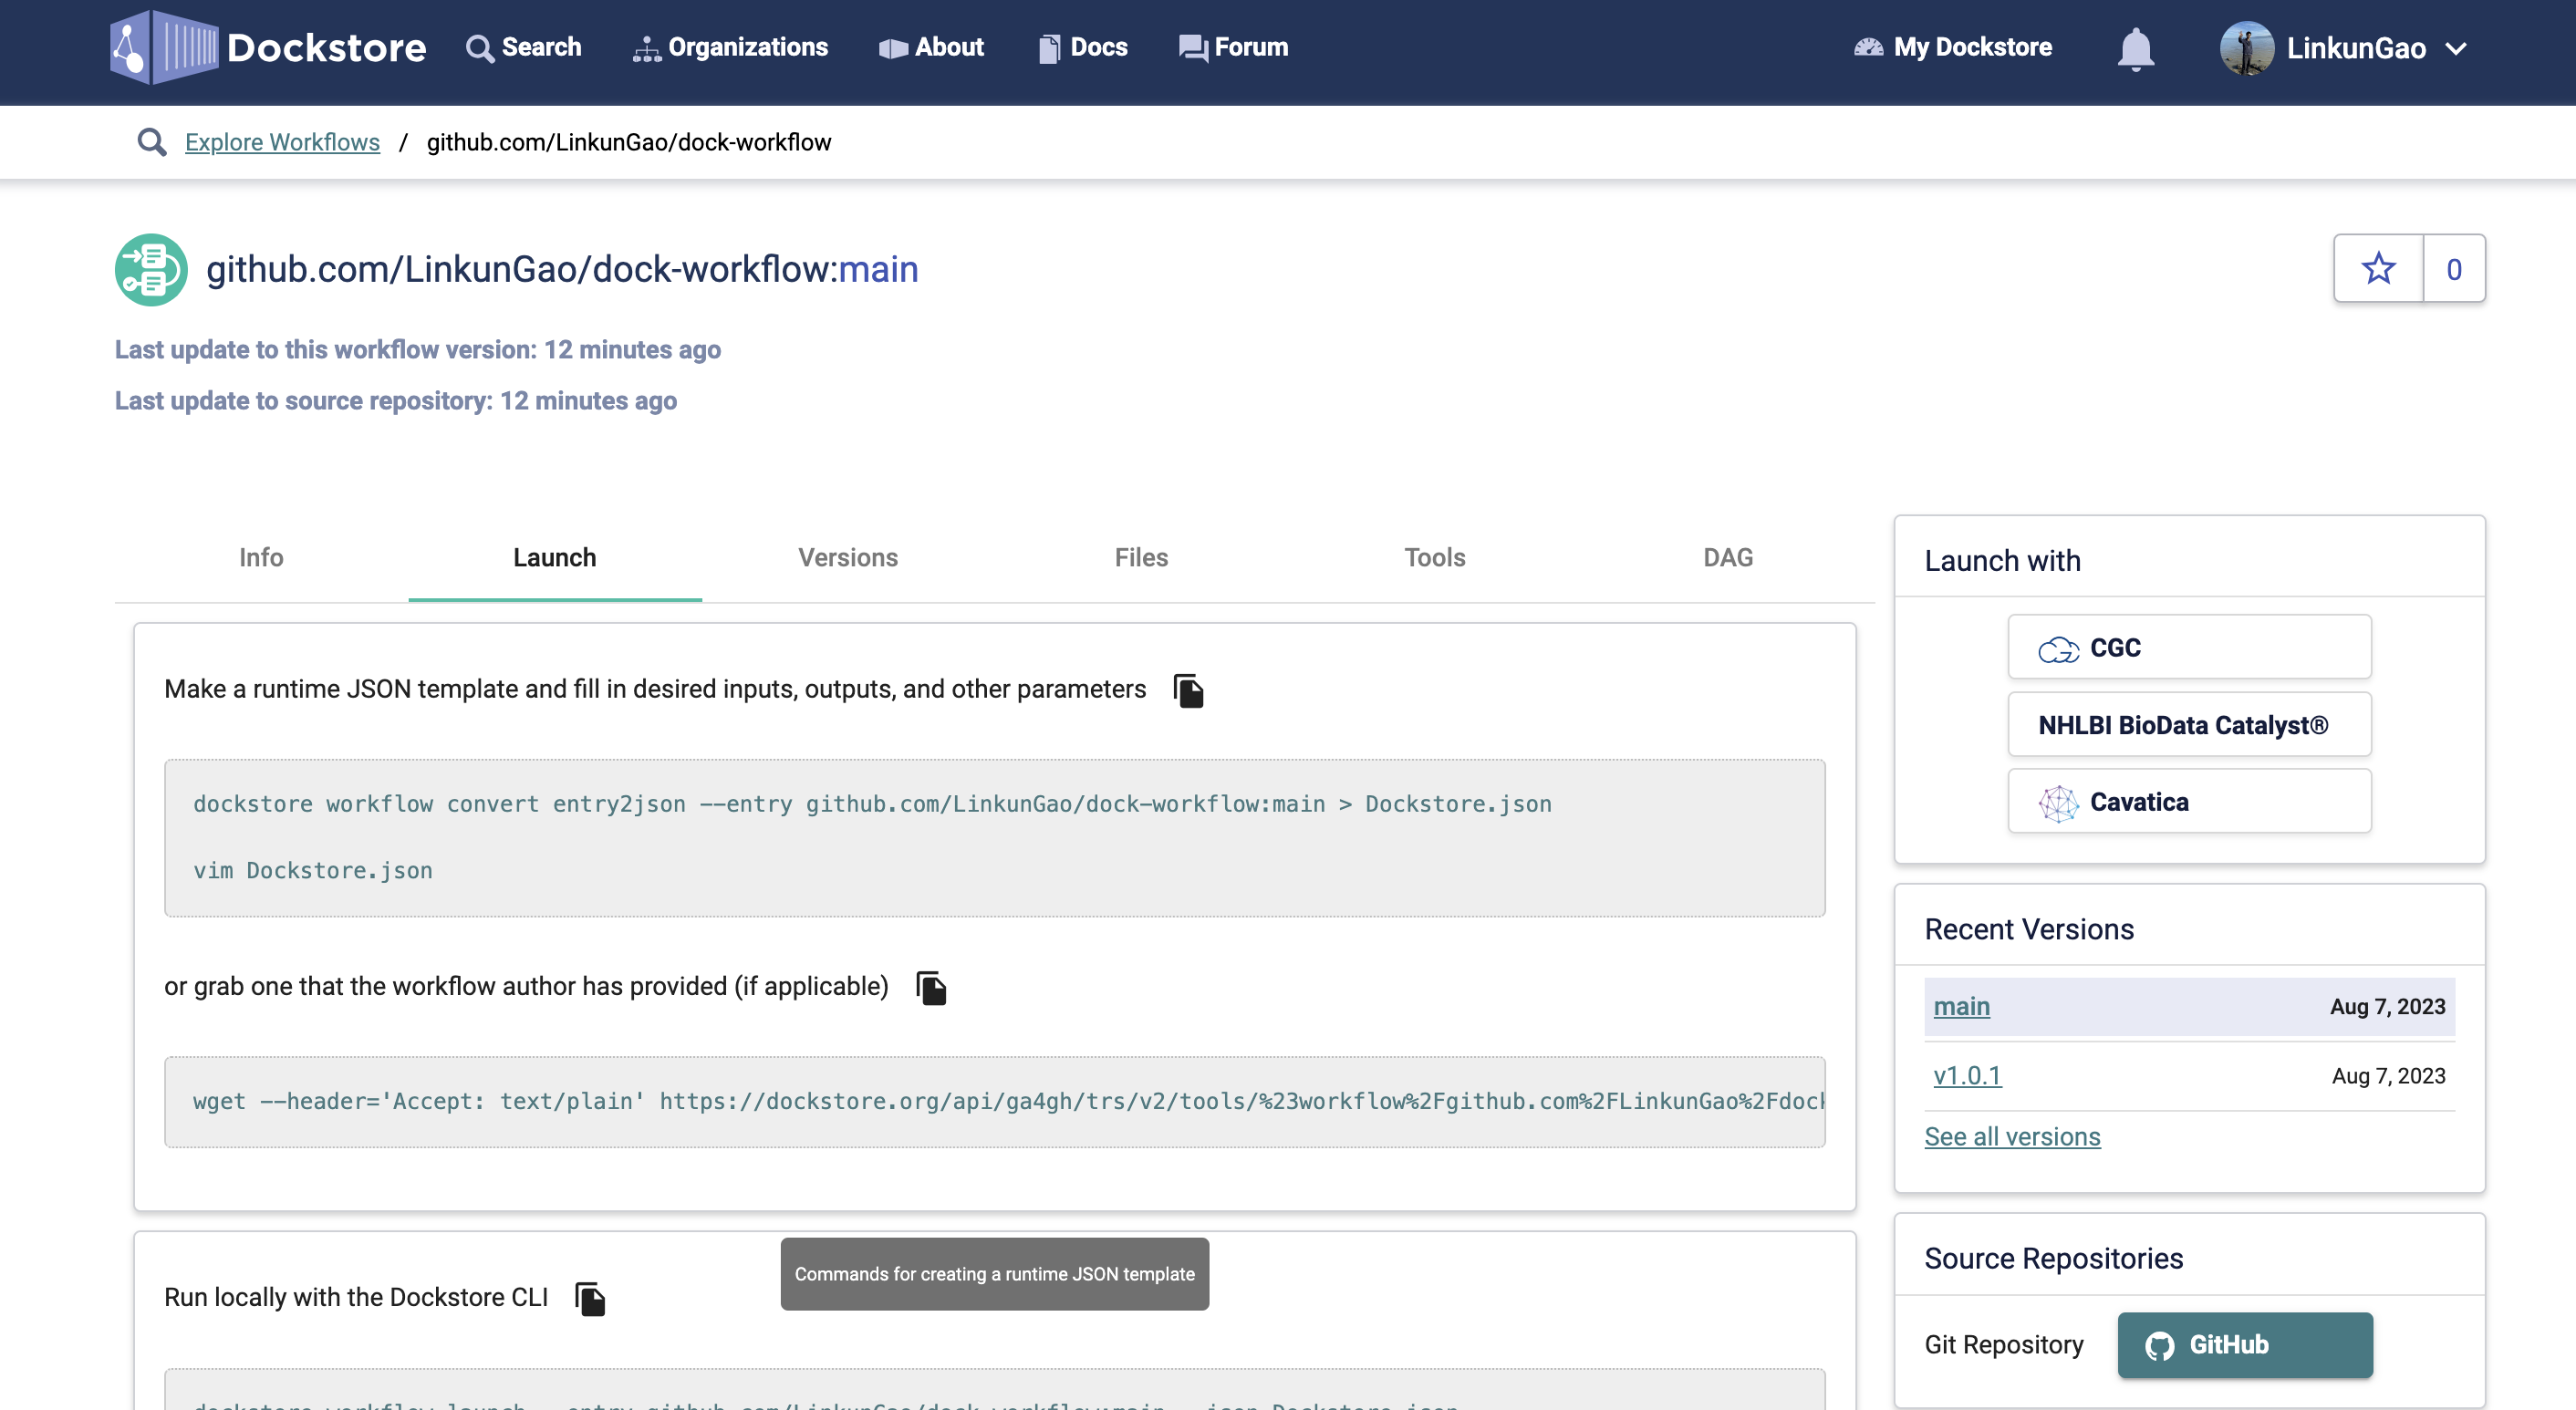

In [7]:
# This code is just to display the screen shot below
Image(filename='./img/dock03.png') 




- In the public Dockstore workflow page, we can click the `launch` tab (shown above), that allow us run the workflow via dockstore CLI. 
- The steps to do this are shown below:
  - Make sure you've already setup the dockstore CLI locally following the steps in tutorial_4
  - Create a empty folder on the desktop
    ```bash
      cd the/empty/folder

      conda activate cwl-dockstore-env
      
      dockstore workflow convert entry2json --entry github.com/your-Github-account/your-repository:main > Dockstore.json

      cwltool \#workflow/github.com/your-Github-account/your-repository:main Dockstore.json
    ```
  - After this the workflow will run locally via dockstore and Github.

## Requirements
pip install sparc_flow

## Loading a work flow

In [10]:
try:
    import sparc_flow 
except Exception:
    print("Please run on linux, sparc_flow does not yet support windows")

workflow = sparc_flow.Workflow()
res = workflow.load_workflow("../tutorial_2/workflow_dataset/primary/workflow")

### Create .dockstroe.yml file

In [11]:
workflow.generate_dockstore_github_requirements("/workflow.cwl", res["workflow_path"], ["/inp_job.yml"],"Your name", "hsgshn@gmail.com")

Now in your workflow folder, you will see the .dockstroe.yml. 

Now you can upload your workflow folder into Your Github repositoy!